# Part II - WeRateDogs dataset
## by DA MATHA Joris Axel

## Investigation Overview


> In this presentation let's see how ratings are distributed in WeRateDogs dataset and also how dog stages impact the favorite count and retweet count on Tweeter.


## Dataset Overview

> This dataset explores tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.



In [1]:
#Import section
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('./twitter_archive_master.csv')

## WeRateDogs rating distribution
We have lots of groups of people who have given little ratings. The majority of rates are between 9 and 13.

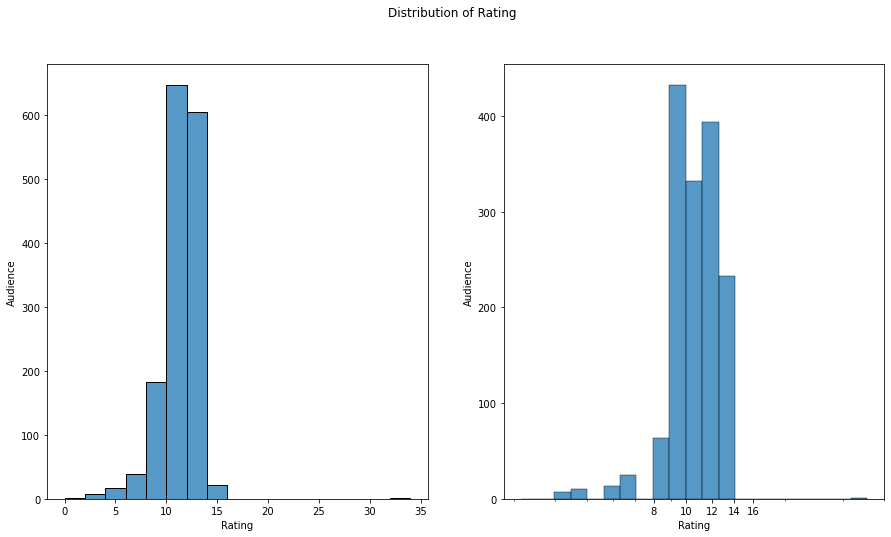

In [3]:
fig, ax =plt.subplots(ncols =2,figsize =[15,8])
binsize = 2
bins = np.arange(df['rating'].min(), df['rating'].max()+binsize, binsize) 
sb.histplot(data = df, x = 'rating',bins = bins,ax=ax[0])
#plt.xlim(xlimx,xlimy)
#plt.yticks(tick,tick_label)
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Audience')
log_binsize = 0.05
bins = 10 ** np.arange(0.5, np.log10(df['rating'].max())+log_binsize, log_binsize)
sb.histplot(data = df, x = 'rating', bins = bins,ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_xticks([8,10,12,14,16] )
ax[1].set_xticklabels(['8', '10','12', '14', '16'])
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Audience')
plt.suptitle('Distribution of Rating')
plt.show()

## Relationship between dogs rating, favorite counts and retweet counts
The rating impacts the count of favorites a little. The latter grows exponentially when the rating increase. On the other hand, the number of retweets is proportional to the number of favorites.

Text(0.5, 0.98, 'Relationship between ratings, favorite counts and retweet counts')

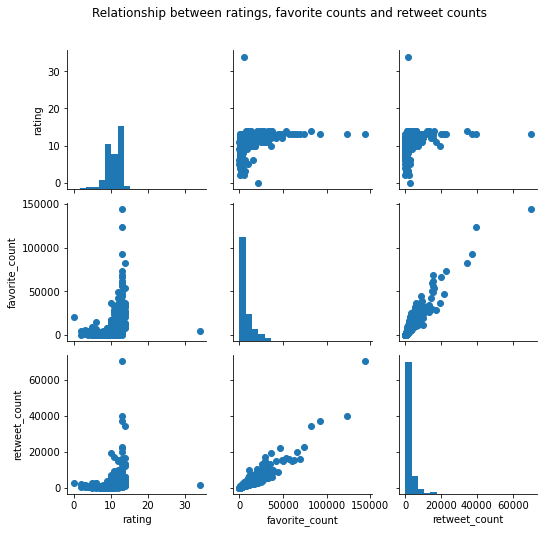

In [4]:
df_samp = df.sample(1000)

g = sb.PairGrid(data = df_samp, vars = ['rating','favorite_count','retweet_count'])
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between ratings, favorite counts and retweet counts')

## Dog stages with best audience
Inside data, we have a lot of pupper. Unfortunately puppers are underrated by audience and as expected their favorite and retweet counts are quite low. Contrary to doggo and puppo which have best results.

Text(0.5, 1.0, 'Ratings Per Dog Stages')

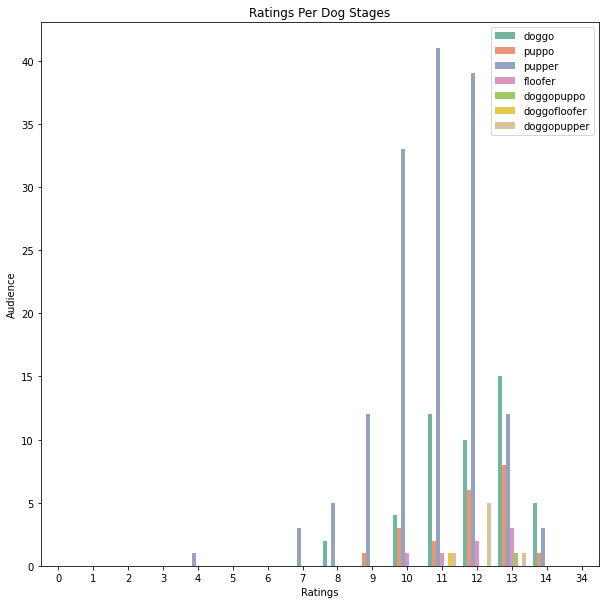

In [5]:
plt.figure(figsize = [10, 10])
sb.countplot(data = df, x = 'rating', hue = 'dog_stage', palette = "Set2")
plt.ylabel('Audience')
plt.xlabel('Ratings')
plt.legend(ncol = 1) # re-arrange legend to reduce overlapping
plt.title('Ratings Per Dog Stages')

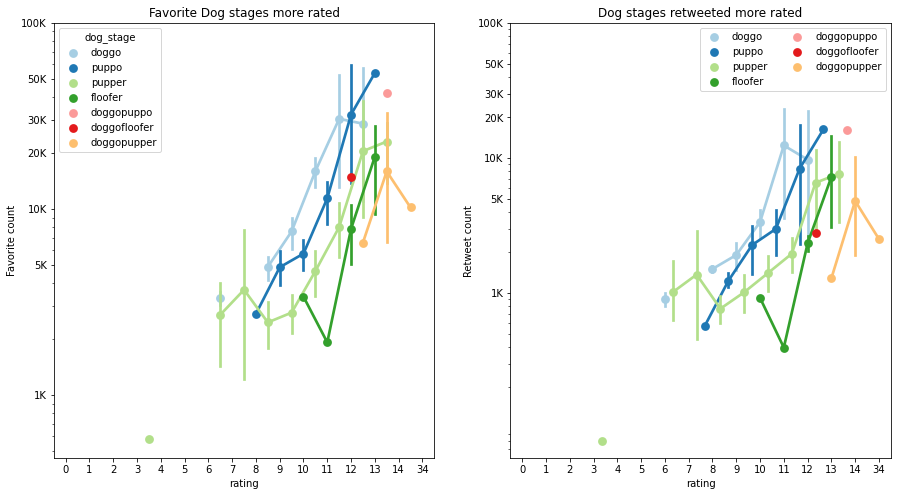

In [6]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data = df, x = 'rating', y = 'favorite_count', hue = 'dog_stage',
           palette = 'Paired',linestyles='-',dodge = 3,errorbar=None, ax=ax[0])
ax[0].set_title('Favorite Dog stages more rated')
ax[0].set_ylabel('Favorite count')
ax[0].set_yscale('log')
ax[0].set_yticks([1000, 5000,10000, 20000, 30000, 50000,100000] )
ax[0].set_yticklabels(['1K', '5K','10K', '20K', '30K', '50K','100K'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data = df, x = 'rating', y = 'retweet_count', hue = 'dog_stage',
           palette = 'Paired',linestyles='-',dodge = 4,errorbar=None, ax=ax[1])
ax[1].set_title('Dog stages retweeted more rated')
ax[1].set_ylabel('Retweet count')
ax[1].set_yscale('log')
ax[1].set_yticks([1000, 5000,10000, 20000, 30000, 50000,100000] )
ax[1].set_yticklabels(['1K', '5K','10K', '20K', '30K', '50K','100K'])
ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

In [7]:
#Slides generation
!jupyter nbconvert ./WeRateDogs_part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook ./WeRateDogs_part_II.ipynb to slides
[NbConvertApp] Writing 730684 bytes to WeRateDogs_part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\SC00454\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\SC00454\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filena